<a href="https://colab.research.google.com/github/sdharaskar/DS552/blob/main/DS552_S25_Assignment2_Swapnil_Dharaskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

RANDOM_STATE=42

In [3]:
# Load the dataset
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Filter for two species (e.g., Adelie and Chinstrap)
filtered_penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]
filtered_penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
filtered_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            220 non-null    object 
 1   island             220 non-null    object 
 2   bill_length_mm     219 non-null    float64
 3   bill_depth_mm      219 non-null    float64
 4   flipper_length_mm  219 non-null    float64
 5   body_mass_g        219 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.8+ KB


In [6]:
filtered_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,219.000000,219.000000,219.000000,219.000000
mean,41.909589,18.369406,191.776256,3710.730594
std,5.477062,1.189914,7.243484,436.250355
min,32.100000,15.500000,172.000000,2700.000000
25%,37.750000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,45.950000,19.100000,196.000000,3987.500000
max,58.000000,21.500000,212.000000,4800.000000


In [8]:
filtered_penguins['species'].unique()

array(['Adelie', 'Chinstrap'], dtype=object)

In [9]:
# Drop rows with missing values
filtered_penguins.dropna(inplace=True)
filtered_penguins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            214 non-null    object 
 1   island             214 non-null    object 
 2   bill_length_mm     214 non-null    float64
 3   bill_depth_mm      214 non-null    float64
 4   flipper_length_mm  214 non-null    float64
 5   body_mass_g        214 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.4+ KB


<ipython-input-9-9b5bdc8cfdcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins.dropna(inplace=True)


In [10]:
# Encode species into binary labels (Adelie -> 0, Chinstrap -> 1)
filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})
filtered_penguins.head()


<ipython-input-10-d261d1519db2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


In [11]:
# Select features and target
X = filtered_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = filtered_penguins['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [14]:
y_prob = model.predict_proba(X_test)
y_prob

array([[1.13179375e-02, 9.88682063e-01],
       [8.92706622e-03, 9.91072934e-01],
       [9.99132577e-01, 8.67422841e-04],
       [1.59056003e-01, 8.40943997e-01],
       [9.59075610e-01, 4.09243901e-02],
       [8.91231902e-01, 1.08768098e-01],
       [9.41970677e-01, 5.80293228e-02],
       [9.95664360e-01, 4.33564022e-03],
       [9.32867035e-01, 6.71329649e-02],
       [8.06701920e-01, 1.93298080e-01],
       [9.93091784e-02, 9.00690822e-01],
       [9.97235826e-01, 2.76417448e-03],
       [9.30029858e-03, 9.90699701e-01],
       [2.98108901e-01, 7.01891099e-01],
       [9.69932249e-01, 3.00677506e-02],
       [1.21176673e-02, 9.87882333e-01],
       [1.15152272e-01, 8.84847728e-01],
       [9.40556658e-01, 5.94433421e-02],
       [9.73264115e-01, 2.67358852e-02],
       [9.70480552e-02, 9.02951945e-01],
       [8.90966650e-01, 1.09033350e-01],
       [9.74866954e-01, 2.51330456e-02],
       [8.70347335e-03, 9.91296527e-01],
       [9.48900362e-01, 5.10996378e-02],
       [8.345622

In [15]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob



array([9.88682063e-01, 9.91072934e-01, 8.67422841e-04, 8.40943997e-01,
       4.09243901e-02, 1.08768098e-01, 5.80293228e-02, 4.33564022e-03,
       6.71329649e-02, 1.93298080e-01, 9.00690822e-01, 2.76417448e-03,
       9.90699701e-01, 7.01891099e-01, 3.00677506e-02, 9.87882333e-01,
       8.84847728e-01, 5.94433421e-02, 2.67358852e-02, 9.02951945e-01,
       1.09033350e-01, 2.51330456e-02, 9.91296527e-01, 5.10996378e-02,
       1.65437744e-01, 9.89981817e-01, 1.14743012e-01, 2.04885968e-03,
       1.47549111e-01, 5.08697988e-02, 8.82232671e-01, 9.94395588e-01,
       1.07467976e-02, 4.56084086e-03, 4.11417889e-02, 7.43394779e-02,
       5.84317855e-03, 4.62479793e-02, 7.73419506e-03, 8.62922773e-03,
       3.59772899e-03, 1.11810339e-02, 9.78119860e-01])

In [19]:
# Evaluate the model
print("Accuracy:\n", accuracy_score(y_test, y_pred))

Accuracy:
 1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

ROC-AUC Score: 1.0


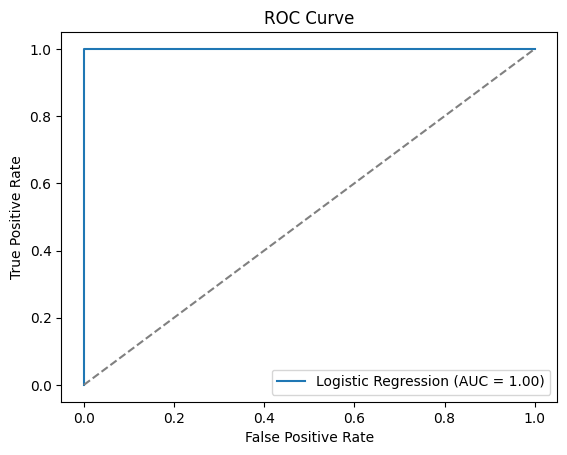

In [18]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


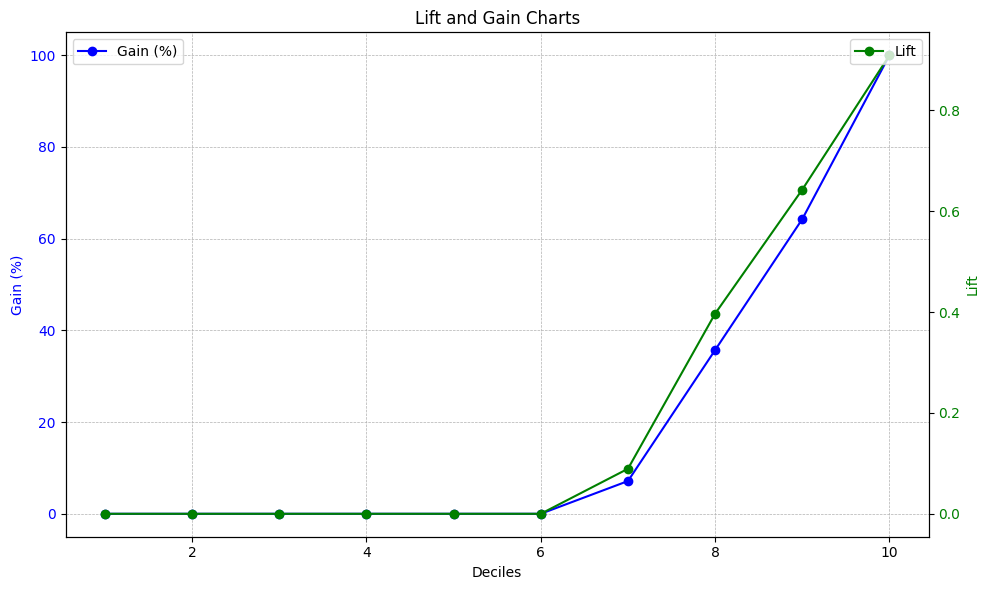

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Function to calculate deciles, lift, and gain
def calculate_lift_gain(y_true, y_prob, n_deciles=10):
    # Create a dataframe with true labels and predicted probabilities
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})

    # Sort by predicted probabilities in descending order
    df.sort_values('y_prob', ascending=False, inplace=True)

    # Create deciles
    df['decile'] = pd.qcut(df['y_prob'], n_deciles, labels=False, duplicates='drop') + 1  # Deciles from 1 to n_deciles

    # Calculate metrics for each decile
    decile_summary = df.groupby('decile').agg(
        positive_count=('y_true', 'sum'),
        total_count=('y_true', 'count')
    )
    decile_summary['cumulative_positives'] = decile_summary['positive_count'].cumsum()
    decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
    decile_summary['gain'] = decile_summary['cumulative_positives'] / df['y_true'].sum()
    decile_summary['lift'] = decile_summary['gain'] / ((decile_summary.index + 1) / n_deciles)

    return decile_summary.reset_index()

# Calculate Lift and Gain for the model
decile_results = calculate_lift_gain(y_test, y_prob, n_deciles=10)

# Prepare data for plotting
deciles = decile_results['decile']
gain = decile_results['gain'] * 100  # Convert to percentage
lift = decile_results['lift']

# Plot Lift and Gain with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gain on the primary y-axis
ax1.set_xlabel('Deciles')
ax1.set_ylabel('Gain (%)', color='blue')
ax1.plot(deciles, gain, marker='o', label='Gain (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')  # Add legend for Gain

# Plot Lift on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Lift', color='green')
ax2.plot(deciles, lift, marker='o', label='Lift', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')  # Add legend for Lift

# Add grid, title, and legends
plt.title('Lift and Gain Charts')
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Load the dataset
penguins = sns.load_dataset("penguins")

# Filter for two species (e.g., Adelie and Chinstrap)
filtered_penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]

# Drop rows with missing values
filtered_penguins.dropna(inplace=True)

# Encode species into binary labels (Adelie -> 0, Chinstrap -> 1)
filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})

# Select features and target
X = filtered_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = filtered_penguins['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [23]:
# Evaluate the model
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

Accuracy Score:
 0.9534883720930233


ROC-AUC Score: 0.9753694581280788


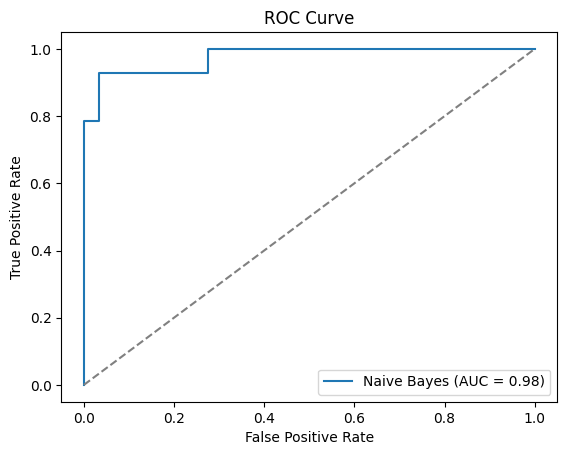

In [24]:
# Evaluate the model
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-22-8785520443f2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins.dropna(inplace=True)
<ipython-input-22-8785520443f2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.93      0.93      0.93        14

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43

ROC-AUC Score: 0.9753694581280788


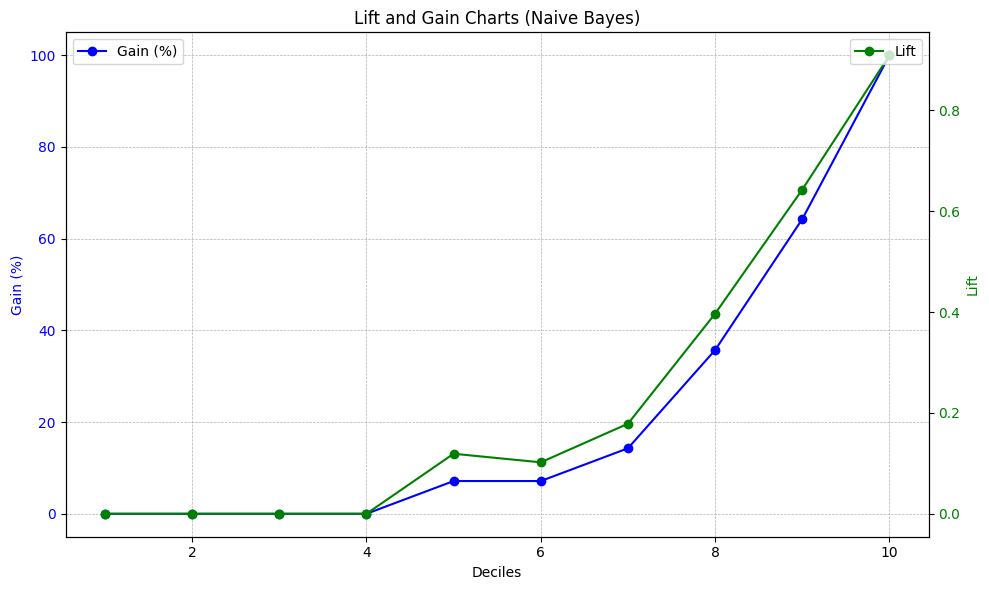

In [22]:
# Evaluate the model

# Function to calculate deciles, lift, and gain
def calculate_lift_gain(y_true, y_prob, n_deciles=10):
    # Create a dataframe with true labels and predicted probabilities
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})

    # Sort by predicted probabilities in descending order
    df.sort_values('y_prob', ascending=False, inplace=True)

    # Create deciles
    df['decile'] = pd.qcut(df['y_prob'], n_deciles, labels=False, duplicates='drop') + 1  # Deciles from 1 to n_deciles

    # Calculate metrics for each decile
    decile_summary = df.groupby('decile').agg(
        positive_count=('y_true', 'sum'),
        total_count=('y_true', 'count')
    )
    decile_summary['cumulative_positives'] = decile_summary['positive_count'].cumsum()
    decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
    decile_summary['gain'] = decile_summary['cumulative_positives'] / df['y_true'].sum()
    decile_summary['lift'] = decile_summary['gain'] / ((decile_summary.index + 1) / n_deciles)

    return decile_summary.reset_index()

# Calculate Lift and Gain for the model
decile_results = calculate_lift_gain(y_test, y_prob, n_deciles=10)

# Prepare data for plotting
deciles = decile_results['decile']
gain = decile_results['gain'] * 100  # Convert to percentage
lift = decile_results['lift']

# Plot Lift and Gain with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gain on the primary y-axis
ax1.set_xlabel('Deciles')
ax1.set_ylabel('Gain (%)', color='blue')
ax1.plot(deciles, gain, marker='o', label='Gain (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')  # Add legend for Gain

# Plot Lift on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Lift', color='green')
ax2.plot(deciles, lift, marker='o', label='Lift', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')  # Add legend for Lift

# Add grid, title, and layout adjustments
plt.title('Lift and Gain Charts (Naive Bayes)')
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Show the plot
plt.show()
